## Модели классификации для нескольких классов
## Выполнил: Кабанов Илья 22П-2

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

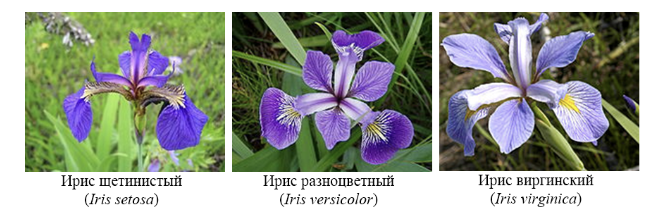

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [7]:
type(iris)

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [8]:
iris_df = pd.DataFrame(iris.data)

In [9]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
iris_df.shape

(150, 6)

In [12]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   name               150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [15]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

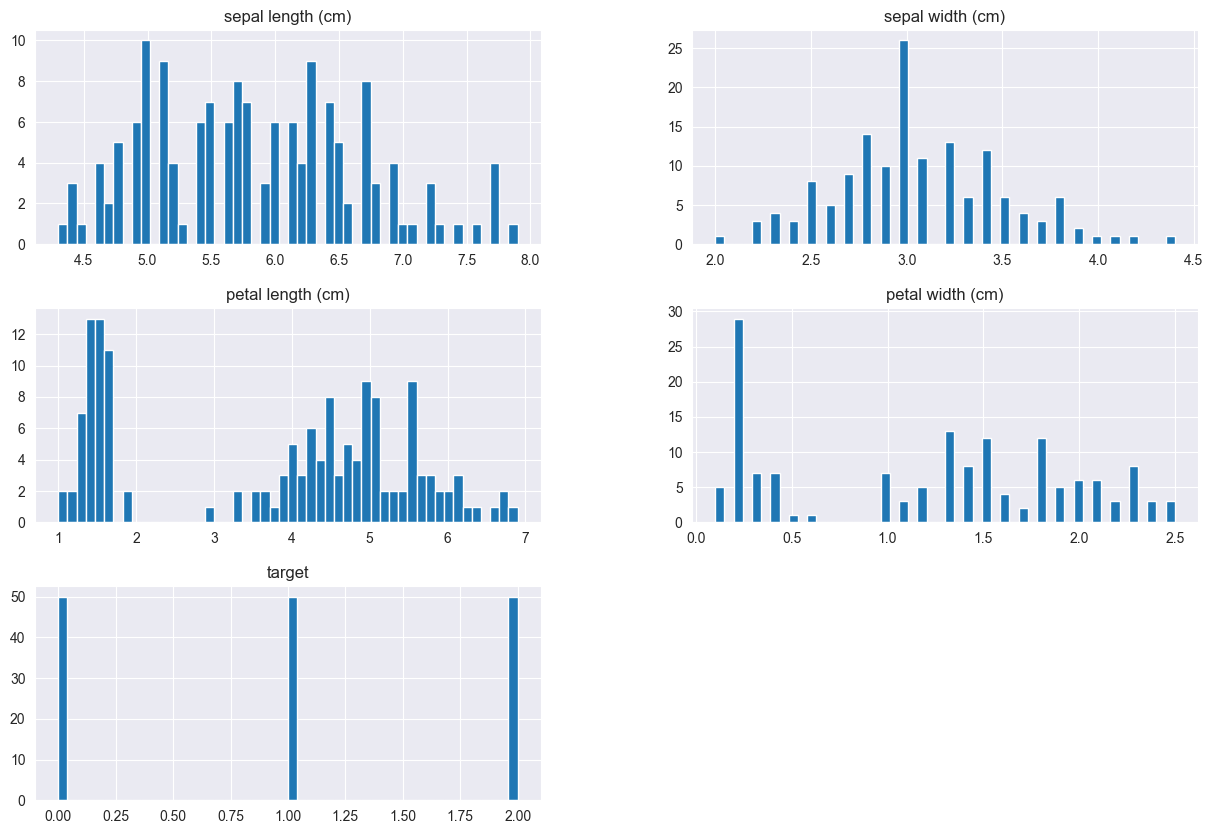

In [16]:
iris_df.hist(figsize = (15,10), bins = 50);

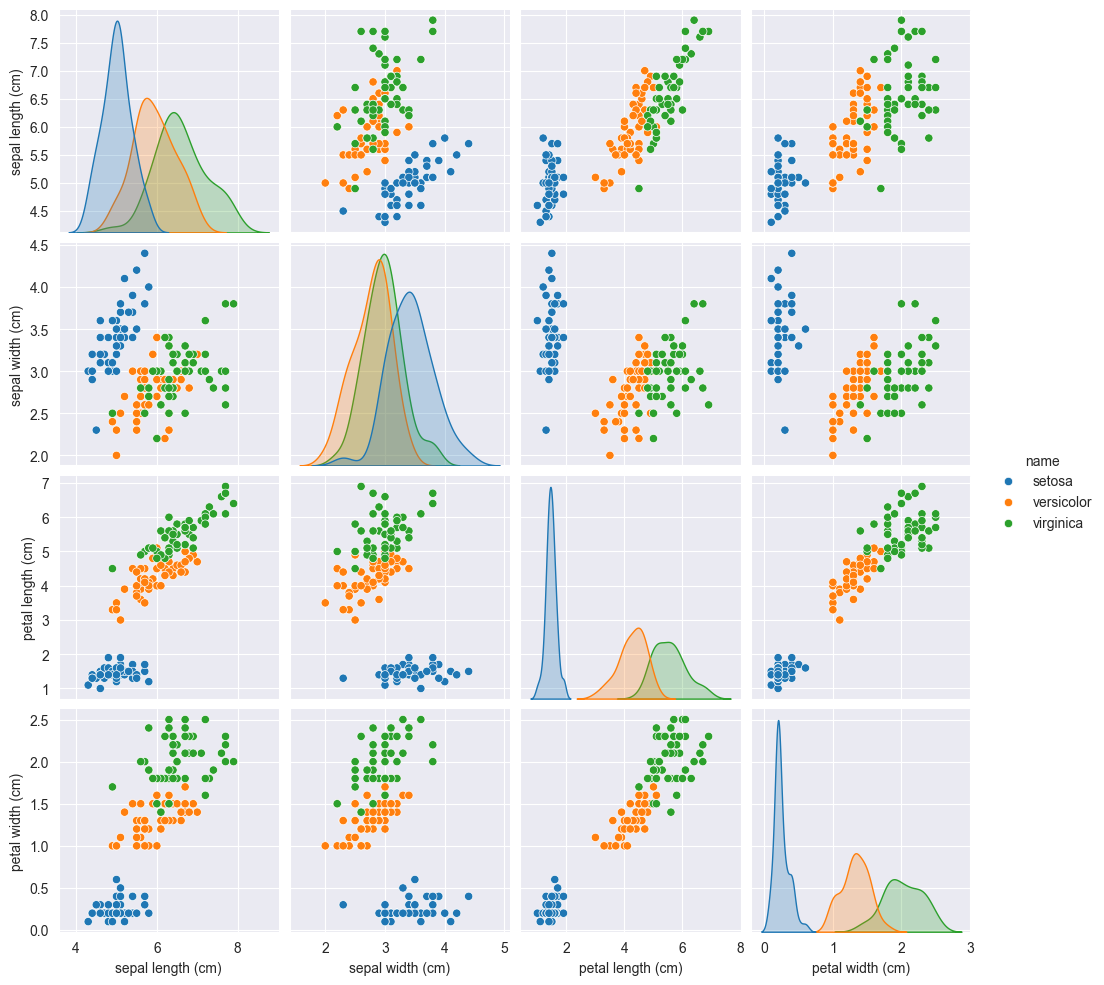

In [17]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

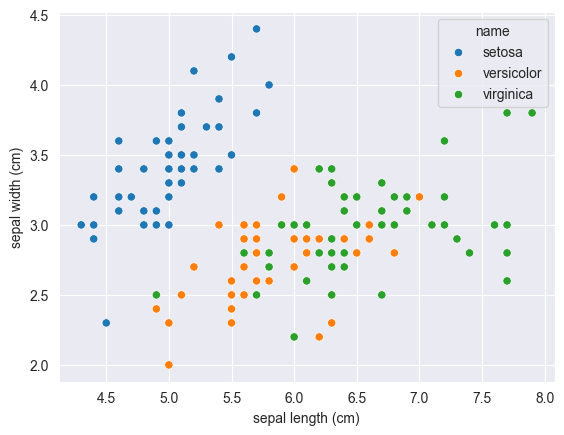

In [18]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

In [19]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

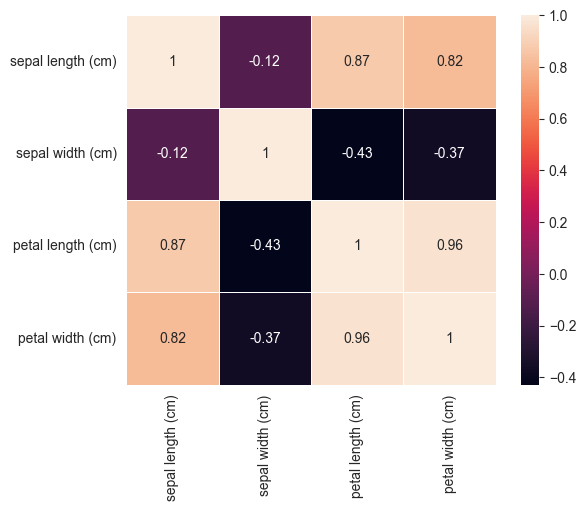

In [20]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение моделей

#### Выбор моделей
1. Нейронная сеть прямого распространения 

Хорошо справляется с задачами классификации, Автоматически извлекает признаки из данных

2. Random Forest 

Показывает высокую точность даже на небольших данных, Не требует масштабирования признаков

3. StackingClassifier

Уменьшает риск ошибок за счёт усреднения результатов, Увеличивает точность предсказаний

In [21]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
iris = load_iris()
X = iris.data
y = iris.target

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_onehot = keras.utils.to_categorical(y_train, 3)
y_test_onehot = keras.utils.to_categorical(y_test, 3)

## 1. Нейронная модель прямого распространения

1-й слой (64 нейрона):

Извлекает основные признаки из данных
Регуляризация и Dropout предотвращают переобучение
BatchNorm ускоряет обучение

2-й слой (32 нейрона):

Выделяет более сложные закономерности
Продолжает бороться с переобучением
Стабилизирует процесс обучения

3-й слой (16 нейронов):

Финальная обработка признаков
Подготавливает данные для классификации

Выход (3 нейрона):

По одному нейрону на каждый вид ириса
Softmax преобразует в вероятности классов

In [26]:
def create_nn_model(input_shape=(4,)):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape,
                    kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        
        layers.Dense(3, activation='softmax')
    ])
    return model

In [27]:
nn_model = create_nn_model()
nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model.fit(
    X_train, y_train_onehot,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=0
)

In [28]:

nn_train_acc = nn_model.evaluate(X_train, y_train_onehot, verbose=0)[1]
nn_test_acc = nn_model.evaluate(X_test, y_test_onehot, verbose=0)[1]
print(f"Точность на обучении: {nn_train_acc:.4f}")
print(f"Точность на тесте: {nn_test_acc:.4f}")

Точность на обучении: 0.9917
Точность на тесте: 0.9333


## 2. Модель классификации (Random Forest)

In [29]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)


In [30]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [32]:
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)
rf_test_acc = accuracy_score(y_test, y_test_pred_rf)

In [33]:
print(f"Точность на обучении: {rf_train_acc:.4f}")
print(f"Точность на тесте: {rf_test_acc:.4f}")

Точность на обучении: 1.0000
Точность на тесте: 0.9000


In [34]:
print("\nОтчет по классификации Random Forest:")
print(classification_report(y_test, y_test_pred_rf, target_names=iris.target_names))



Отчет по классификации Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


In [35]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

## 3. Ансамблевая модель (StackingClassifier)

In [36]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

In [37]:
meta_model = LogisticRegression(random_state=42, max_iter=1000)

In [38]:
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True  
)


In [39]:
stacking_model.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...), ...]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,5
,stack_method,'auto'
,n_jobs,-1
,passthrough,True
,verbose,0
,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [40]:
y_train_pred_stack = stacking_model.predict(X_train)
y_test_pred_stack = stacking_model.predict(X_test)

In [41]:
stack_train_acc = accuracy_score(y_train, y_train_pred_stack)
stack_test_acc = accuracy_score(y_test, y_test_pred_stack)

In [42]:
print(f"Точность на обучении: {stack_train_acc:.4f}")
print(f"Точность на тесте: {stack_test_acc:.4f}")

Точность на обучении: 0.9833
Точность на тесте: 0.9667


In [43]:
cv_scores_stack = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')

#### Промежуточный вывод
Мы получили 3 модели - нейронную модель, классификации, ансамблевую. Каждая модель показала хорошие результаты (более 90 процентов верных ответов). Необходимо сравнить их между собою и выяснить, какая модель лучшая

## Сравнение моделей

In [44]:
print("\n" + "="*70)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МОДЕЛЕЙ")
print("="*70)
print(f"{'Модель':<30} {'Train Acc':<12} {'Test Acc':<12} {'CV Score':<12}")
print("-"*70)
print(f"{'Нейронная сеть (MLP)':<30} {nn_train_acc:<12.4f} {nn_test_acc:<12.4f} {'-':<12}")
print(f"{'Random Forest':<30} {rf_train_acc:<12.4f} {rf_test_acc:<12.4f} {cv_scores_rf.mean():<12.4f}")
print(f"{'Stacking Classifier':<30} {stack_train_acc:<12.4f} {stack_test_acc:<12.4f} {cv_scores_stack.mean():<12.4f}")
print("="*70)


СРАВНИТЕЛЬНАЯ ТАБЛИЦА МОДЕЛЕЙ
Модель                         Train Acc    Test Acc     CV Score    
----------------------------------------------------------------------
Нейронная сеть (MLP)           0.9917       0.9333       -           
Random Forest                  1.0000       0.9000       0.9500      
Stacking Classifier            0.9833       0.9667       0.9583      


## Визуализация

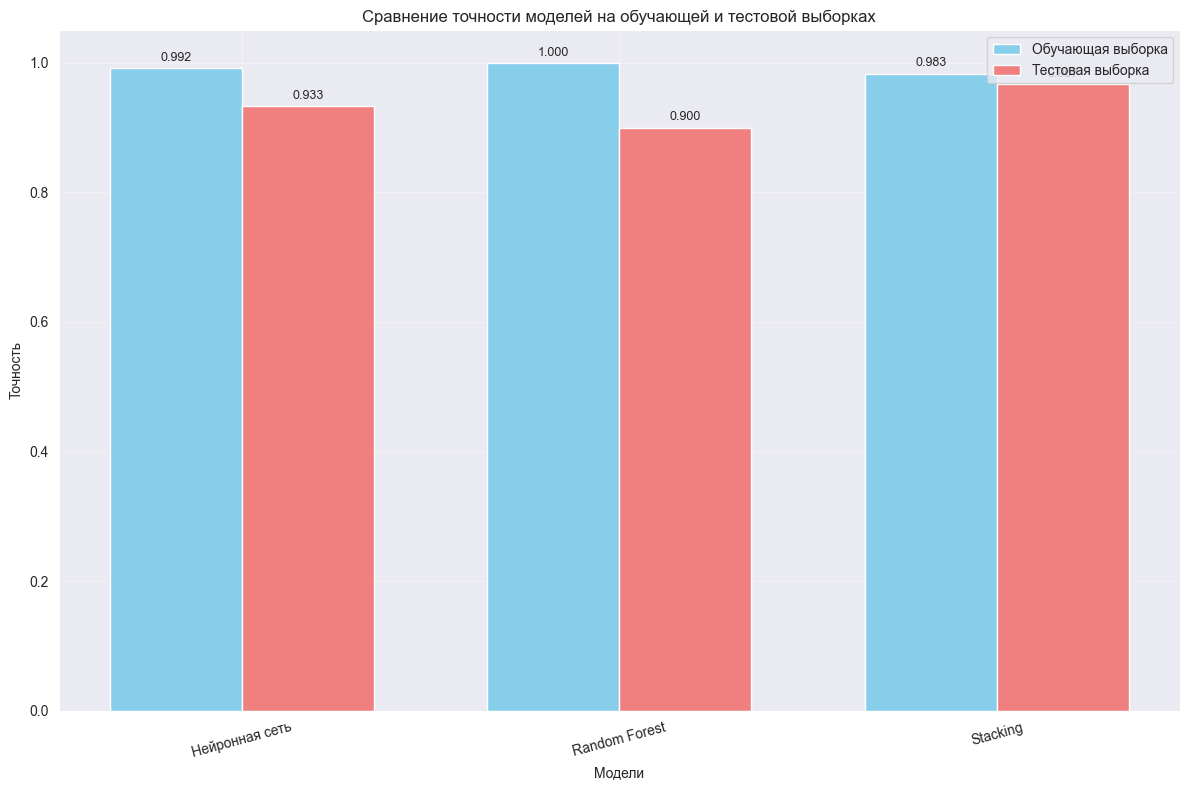

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))

models = ['Нейронная сеть', 'Random Forest', 'Stacking']
train_scores = [nn_train_acc, rf_train_acc, stack_train_acc]
test_scores = [nn_test_acc, rf_test_acc, stack_test_acc]

x = np.arange(len(models))
width = 0.35

rects1 = ax.bar(x - width/2, train_scores, width, label='Обучающая выборка', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Тестовая выборка', color='lightcoral')

ax.set_xlabel('Модели')
ax.set_ylabel('Точность')
ax.set_title('Сравнение точности моделей на обучающей и тестовой выборках')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()
ax.grid(True, alpha=0.3)

for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


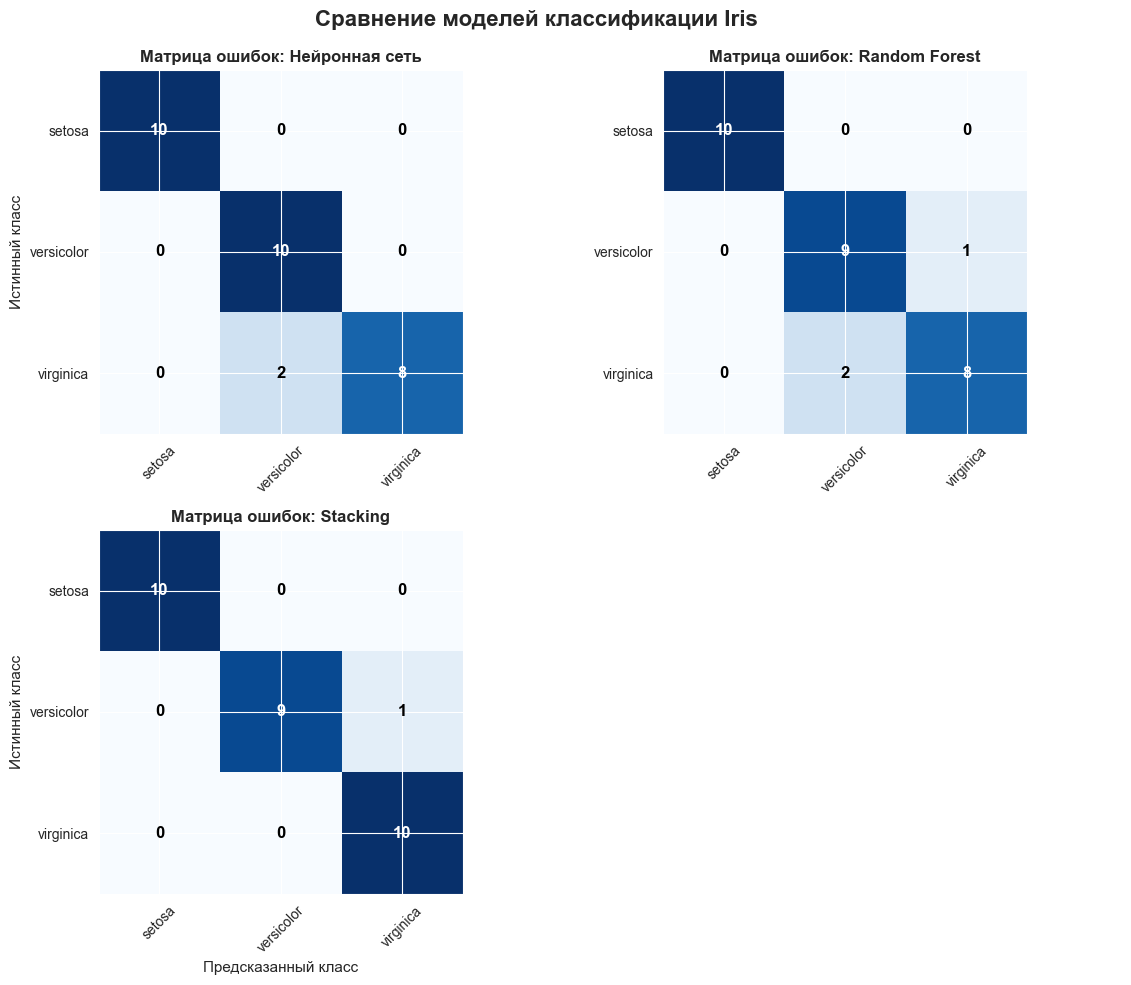

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Сравнение моделей классификации Iris', fontsize=16, fontweight='bold')

models_preds = [
    (nn_model.predict(X_test).argmax(axis=1), 'Нейронная сеть'),
    (y_test_pred_rf, 'Random Forest'),
    (y_test_pred_stack, 'Stacking')
]

axes[1, 1].axis('off')

for idx, (pred, title) in enumerate(models_preds):
    if idx == 0: 
        row, col = 0, 0
    elif idx == 1:
        row, col = 0, 1
    else: 
        row, col = 1, 0
    
    ax = axes[row, col]
    cm = confusion_matrix(y_test, pred)
    
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'Матрица ошибок: {title}', fontweight='bold')
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > cm.max()/2 else "black",
                   fontsize=12, fontweight='bold')
    
    ax.set_xticks(np.arange(len(iris.target_names)))
    ax.set_yticks(np.arange(len(iris.target_names)))
    ax.set_xticklabels(iris.target_names, rotation=45, fontsize=10)
    ax.set_yticklabels(iris.target_names, fontsize=10)
    
    if col == 0:
        ax.set_ylabel('Истинный класс', fontsize=11)
    if row == 1:
        ax.set_xlabel('Предсказанный класс', fontsize=11)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

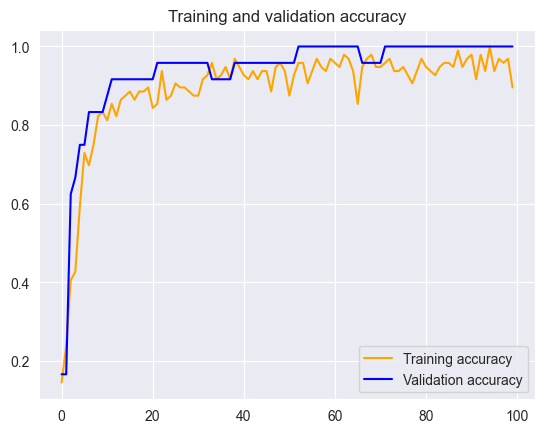

<Figure size 640x480 with 0 Axes>

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Вывод

В рамках данного исследования были реализованы и протестированы три различных подхода к решению задачи классификации на наборе данных ирисов:  
— нейронная сеть прямого распространения (MLP),  
— случайный лес (Random Forest),  
— ансамблевый метод StackingClassifier.  

Модели обучались на заранее подготовленных и нормализованных данных, что позволило достичь высокой и стабильной точности на тестовой выборке.

## Результаты

- **Нейронная сеть (MLP)** показала точность **0.9333**, что свидетельствует о её способности эффективно выявлять сложные нелинейные зависимости в данных.
- **Random Forest** продемонстрировал точность **0.9000**, подтвердив свою надёжность и устойчивость к переобучению даже на небольшом объёме данных.
- **StackingClassifier** достиг наилучшего результата — **0.9667**, что подтверждает эффективность ансамблевого подхода, объединяющего сильные стороны отдельных моделей.

## Заключение

Наивысшую точность классификации продемонстрировала модель **StackingClassifier**, что делает её наиболее подходящей для данной задачи.  
Это связано с её способностью комбинировать предсказания базовых моделей (включая нейронную сеть и Random Forest), тем самым снижая ошибку и повышая обобщающую способность.  
Нейронная сеть также показала себя достойно, что говорит о потенциале глубокого обучения даже для задач с малым объёмом данных.